In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def plot_stats_cat(train_df, test_df, column_name, title='Title', target='category'):
    sns.set_palette("Set2")
    
    # Sort the DataFrame by category
    train_df = train_df.sort_values(by=target).reset_index(drop=True)

    # Calculate mean and standard deviation for each category
    train_stats = train_df.groupby(target)[column_name].agg(['mean', 'std']).reset_index()

    # Create a figure with subplots
    fig = plt.figure(figsize=(13, 8))
    gs = gridspec.GridSpec(3, 2, width_ratios=[2.2, 1])

    # Add a title to the figure
    fig.suptitle(title, fontsize=30, fontweight='bold', ha='left', x=0.01)

    # Plot the raw data on the left half
    ax1 = plt.subplot(gs[:, 0])
    sns.scatterplot(x=train_df.index, y=column_name, hue=target, data=train_df, ax=ax1)
    sns.scatterplot(x=test_df.index, y=column_name, data=test_df, ax=ax1, label='test', marker='x', alpha=0.8)
    
    ax1.set_title('Raw Data')
    ax1.set_xlabel('ID')
    ax1.set_ylabel(column_name)

    # Plot the histogram
    ax2 = plt.subplot(gs[0, 1])
    sns.kdeplot(data=train_df, x=column_name, fill=True, hue=target, ax=ax2, alpha=0.5)
    ax2.set_title('Histogram')

    # Plot the violin plot
    ax3 = plt.subplot(gs[1, 1])
    sns.violinplot(x=target, y=column_name, data=train_df, ax=ax3)
    ax3.set_title('Violin Plot')

    # Plot train and test distribution comparison
    ax4 = plt.subplot(gs[2, 1])
    sns.kdeplot(data=train_df, x=column_name, fill=True, color='blue', label='Train', alpha=0.5, ax=ax4)
    sns.kdeplot(data=test_df, x=column_name, fill=True, color='red', label='Test', alpha=0.5, ax=ax4)
    ax4.set_title('Train vs Test Distribution')
    ax4.legend()

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to make room for the title
    plt.show()

def plot_stats_cat_to_cat(train_df, test_df, column_x, column_y, title='Title'):
    sns.set_palette("Set2")
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(13, 8))
    gs = gridspec.GridSpec(3, 2, width_ratios=[2.2, 1])

    # Add a title to the figure
    fig.suptitle(title, fontsize=30, fontweight='bold', ha='left', x=0.01)

    # Plot the count plot for train data
    ax1 = plt.subplot(gs[0, 0])
    sns.countplot(x=column_x, hue=column_y, data=train_df, ax=ax1)
    ax1.set_title('Train Data Count Plot')
    ax1.set_xlabel(column_x)
    ax1.set_ylabel('Count')

    # Plot the count plot for test data
    ax2 = plt.subplot(gs[1, 0])
    sns.countplot(x=column_x, data=test_df, ax=ax2)
    ax2.set_title('Test Data Count Plot')
    ax2.set_xlabel(column_x)
    ax2.set_ylabel('Count')

    # Plot the heatmap for train data
    ax3 = plt.subplot(gs[0, 1])
    train_pivot = train_df.pivot_table(index=column_y, columns=column_x, aggfunc='size', fill_value=0)
    sns.heatmap(train_pivot, annot=True, fmt='d', cmap='Blues', ax=ax3)
    ax3.set_title('Train Data Heatmap')



    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to make room for the title
    plt.show()

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

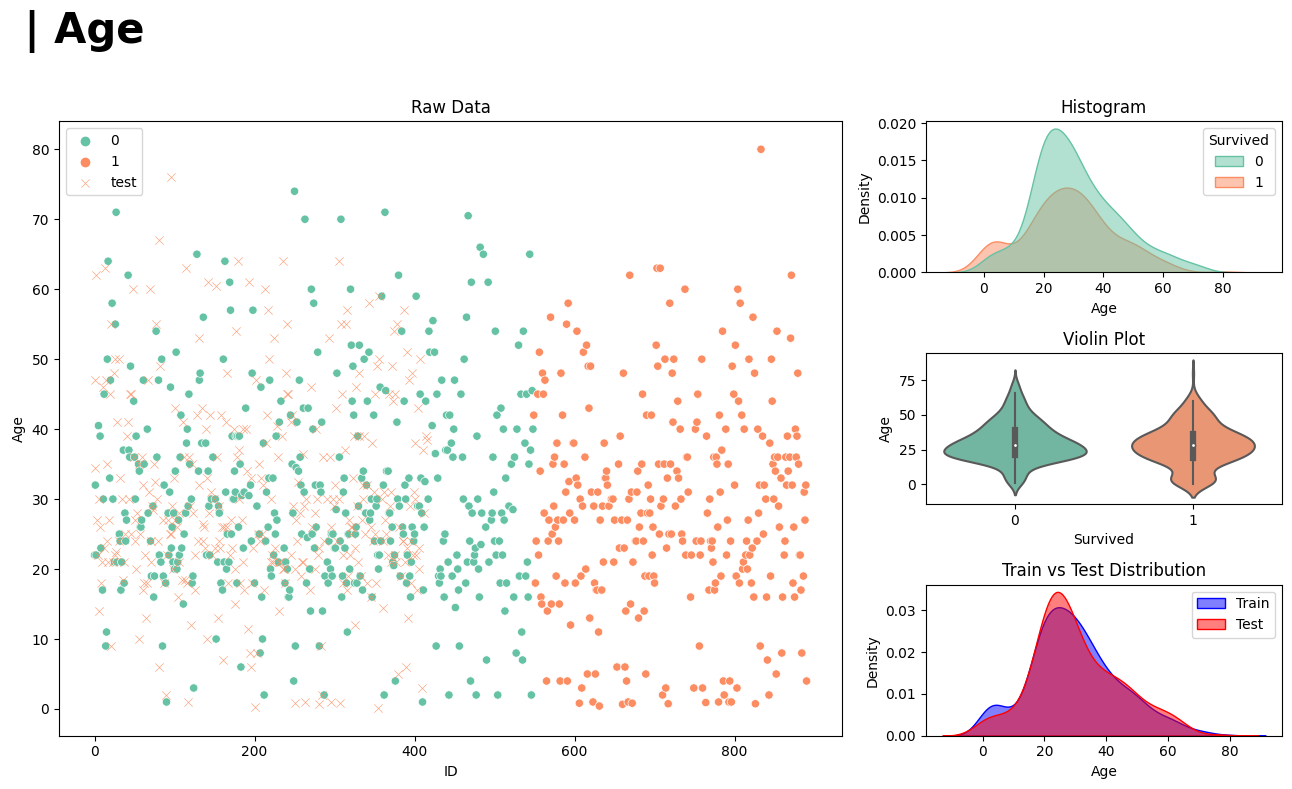

In [4]:
plot_stats_cat(df, test_df, column_name='Age', title=' | Age', target='Survived')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

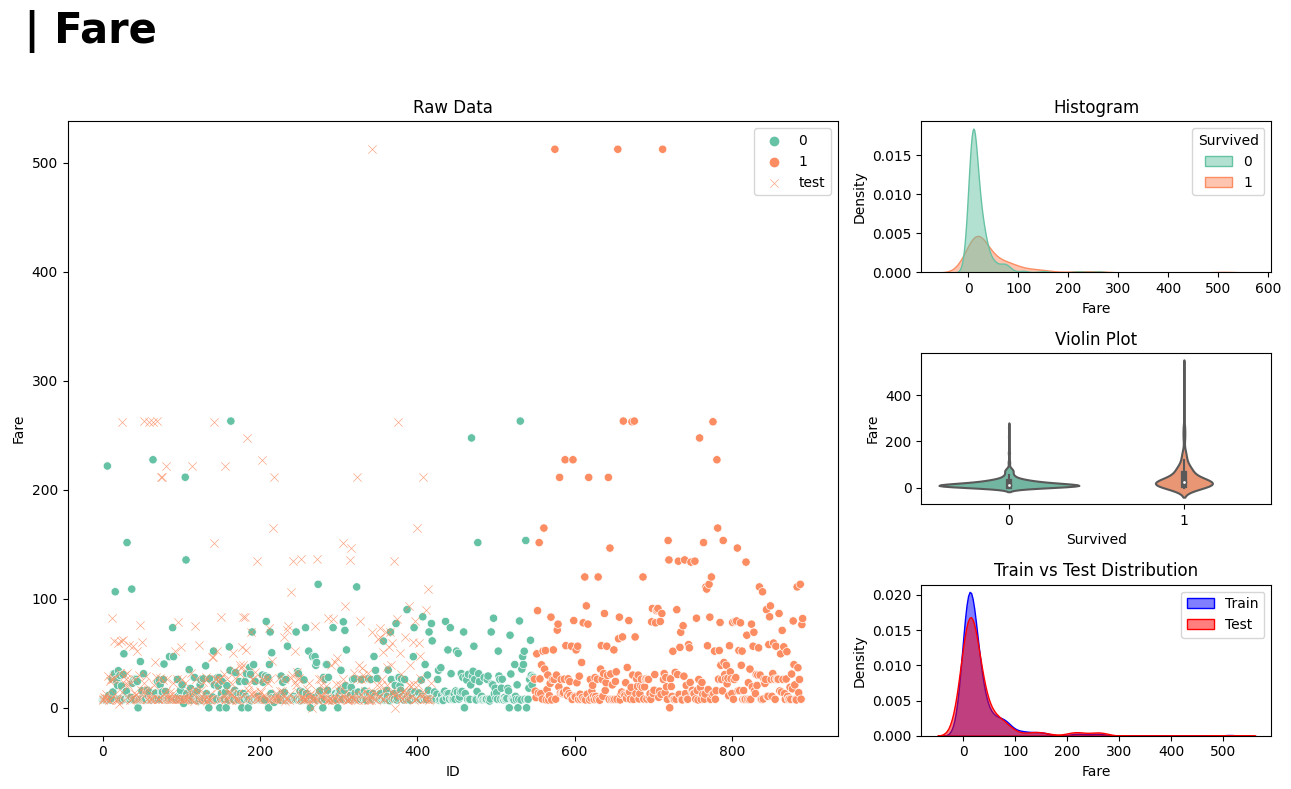

In [5]:
plot_stats_cat(df,test_df, column_name='Fare', title=' | Fare', target='Survived')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

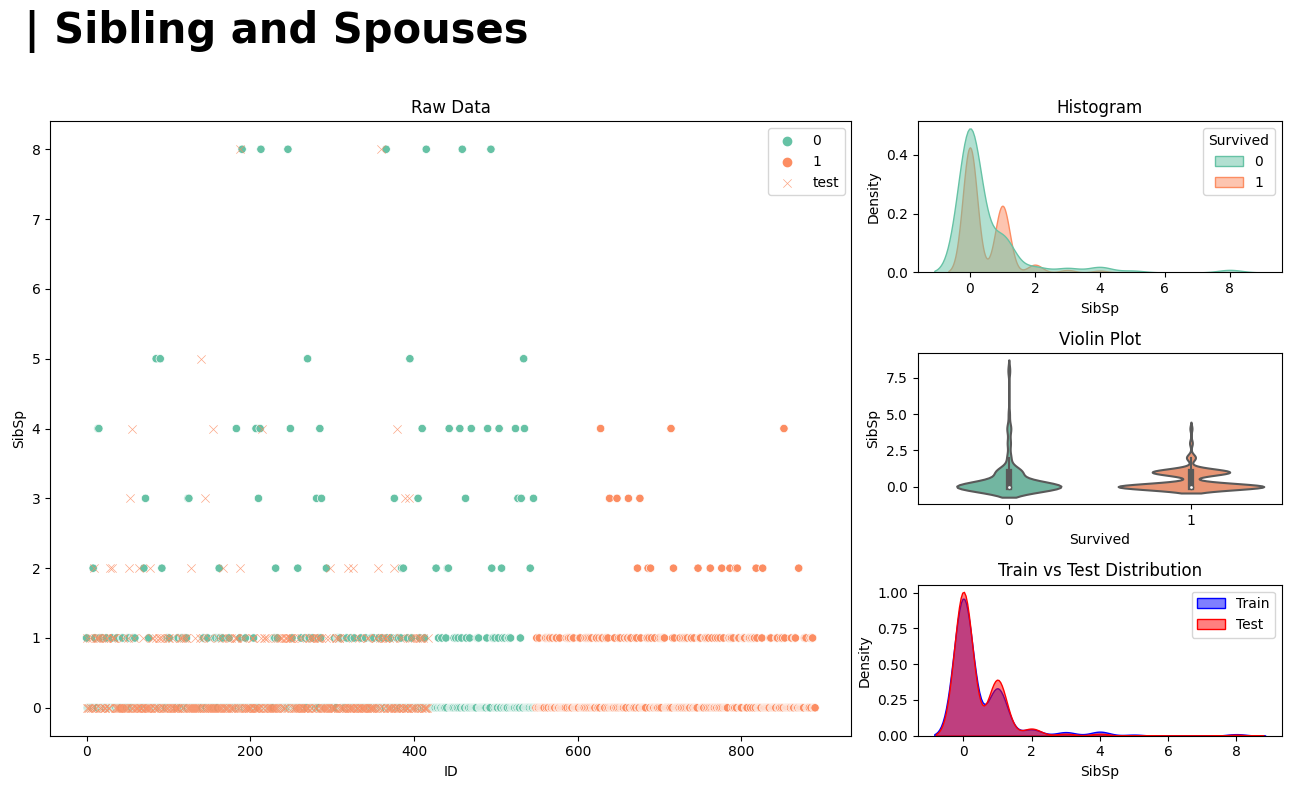

In [6]:
plot_stats_cat(df, test_df, column_name='SibSp', title=' | Sibling and Spouses', target='Survived')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

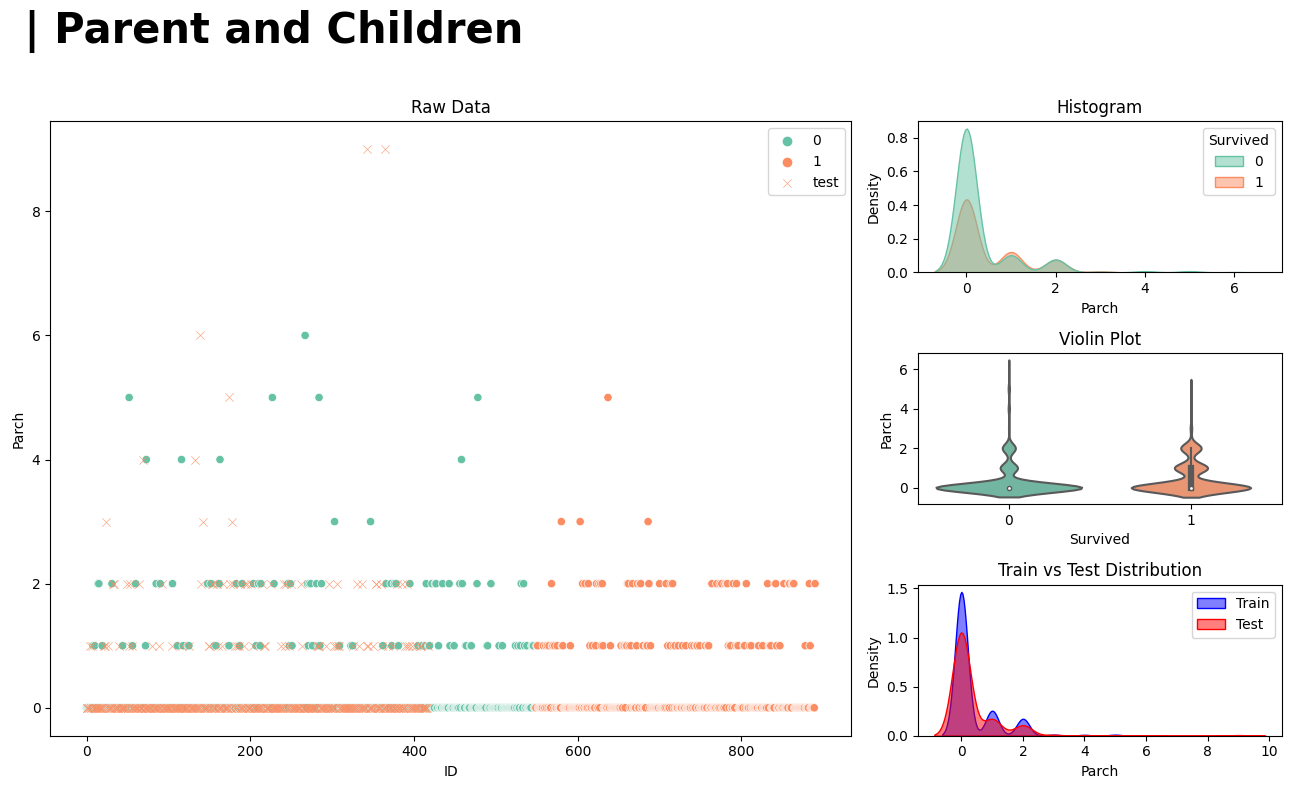

In [7]:
plot_stats_cat(df, test_df, column_name='Parch', title=' | Parent and Children', target='Survived')

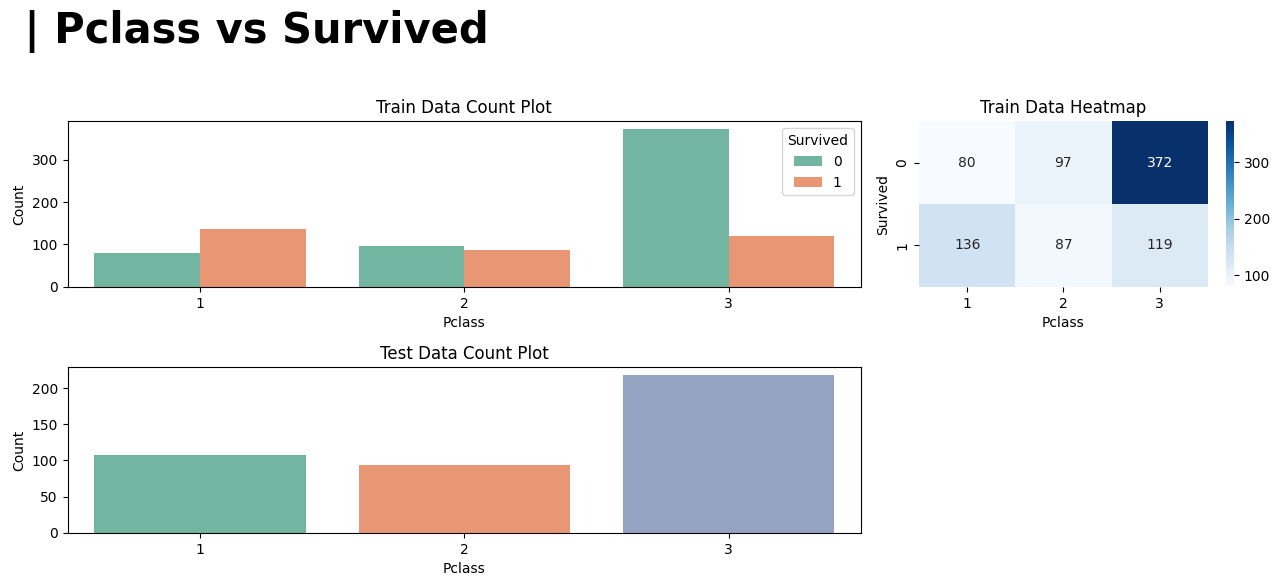

In [8]:
plot_stats_cat_to_cat(df, test_df, column_x='Pclass', column_y='Survived', title=' | Pclass vs Survived')

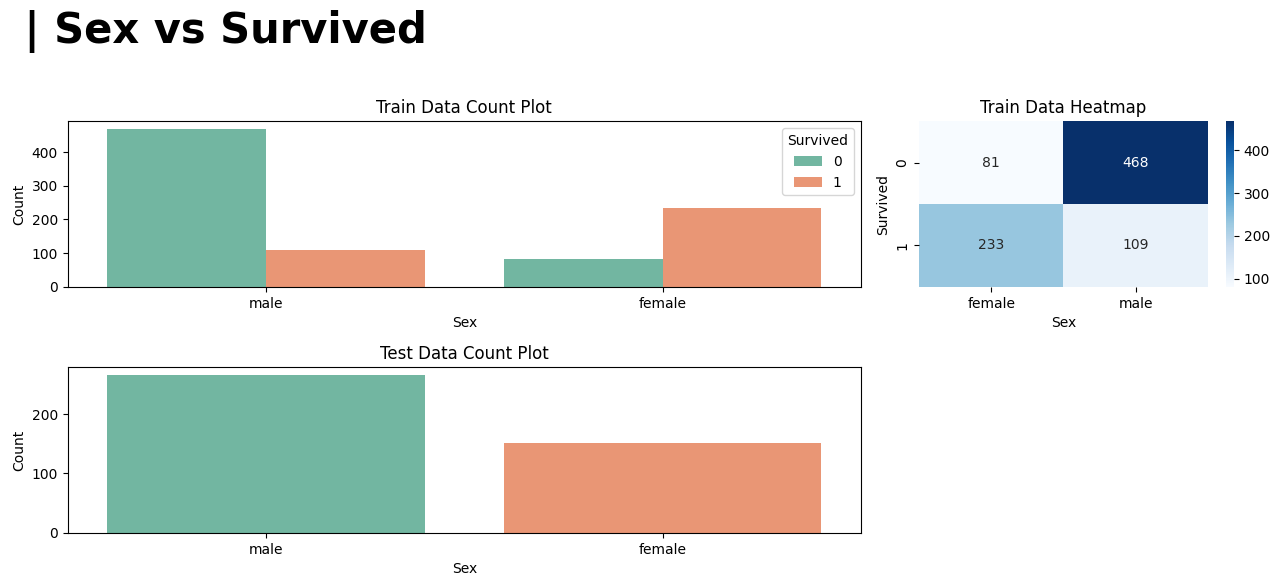

In [9]:
plot_stats_cat_to_cat(df, test_df, column_x='Sex', column_y='Survived', title=' | Sex vs Survived')

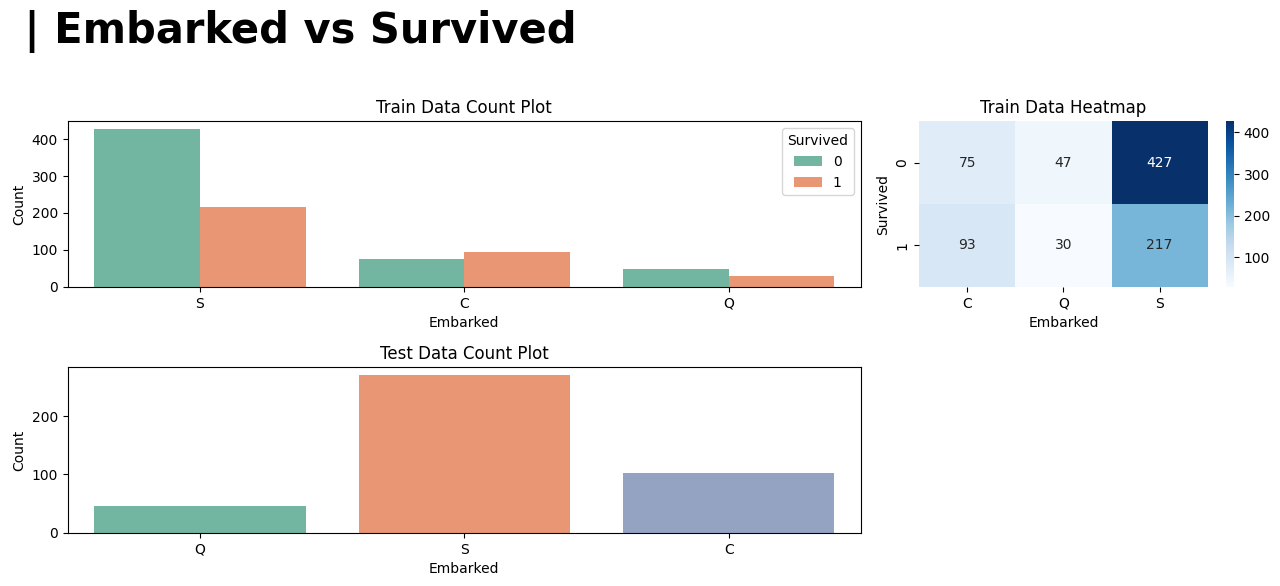

In [10]:
plot_stats_cat_to_cat(df, test_df, column_x='Embarked', column_y='Survived', title=' | Embarked vs Survived')